# Simple Linear Regression. Minimal Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs

## Random input data to train on

**np.random.uniform(low, high, size)** - draws a random value from the interval (low,high), where each number has an equal chance to be selected

#### size = number of observations (n) x(by) number of variables (k)

In [2]:
observations = 1000

# f(x,z) = a*x + b*z + c
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs)) # n x k = 1000 x 2

print(inputs.shape)

(1000, 2)


**np.column_stack(appropriate tuples)** - takes a sequence of 1D arrays and stacks them into a single 2D array

## Targets we will aim at

#### targets = f(x,z) = 2*x -3*z + 5 + noise
arbitrary chosen. Real data always contains noise.

**weights_1** = 2, **weights_2** = -3, **bias** = 5

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


## Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce.

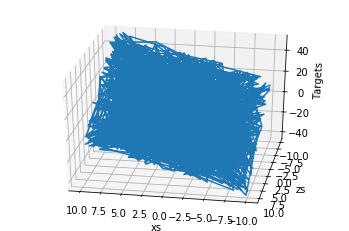

In [4]:
# in order to use the 3D plot, the objects should have a certain shape, so we reshapel the targets.
# The proper method to use is reshape and takes as arguments the dimensions in whcih we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing use to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# can fiddle with the azim parameter to plot the data from different angles. Just change the value
# of azim=100 to azim=0; azim=200, or whatever.
ax.view_init(azim=100)

plt.show()
targets = targets.reshape(observations,1)

Linear relationship in 3D is a **Plane**.

## Initialize variables

In [5]:
# Our initial weights and biases will be picked randomly from the interval[-0.1,0.1]
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1)) # W = 2 x 1

biases = np.random.uniform(-init_range,init_range,size=1) # b = 1 x 1

print(weights)
print(biases)

[[ 0.09063591]
 [-0.08983971]]
[0.06069228]


## Set a learning rate

In [6]:
learning_rate = 0.02

## Train the model

In [10]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases # (1000 x 2) dot (2 x 1) = 1000 x 1
    deltas = outputs - targets # 1000 x 1
    
    loss = np.sum(deltas**2) / 2 / observations # Loss/observations = Mean loss
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    # Formulas
    weights = weights - learning_rate*np.dot(inputs.T, deltas_scaled) # 2x1 - scalar*(2x1000,1000x1)
        # = 2 x 1
    biases = biases - learning_rate*np.sum(deltas_scaled)

0.37881563823720504
0.370301552076437
0.3621244380126208
0.35427095930098035
0.3467283070409239
0.33948417928492597
0.33252676097424366
0.32584470466874393
0.31942711203940366
0.3132635160933073
0.3073438641021476
0.30165850120637816
0.29619815466829524
0.29095391874834253
0.2859172401799941
0.28107990421950807
0.27643402124780847
0.2719720139026415
0.2676866047200168
0.26357080426477625
0.2596178997309355
0.25582144399320395
0.25217524509182276
0.24867335613357539
0.24531006559250138
0.24207988799448182
0.2389775549705225
0.23599800666412263
0.2331363834787303
0.2303880181518164
0.2277484281426415
0.22521330832130537
0.2227785239471432
0.22044010392503174
0.21819423432859478
0.2160372521797475
0.21396563947443933
0.21197601744484137
0.2100651410486322
0.2082298936763825
0.20646728206841553
0.20477443143284518
0.2031485807568392
0.2015870783034467
0.20008737728665918
0.1986470317176424
0.1972636924153653
0.1959351031751244
0.19465909708870874
0.1934335930102062
0.19225659216168692
0.19

## Print weights and biases and see if we have worked correctly

In [11]:
print(weights, biases)

[[ 1.99771668]
 [-3.0029017 ]] [4.90106666]


2, -3, 5

## Plot last ouputs vs targets

The closer the plot is to a 45 degree line, the closer target and output values are.

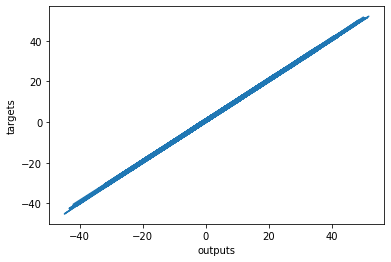

In [9]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()